In [13]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import imdb

### Бинарная классификация 

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 21s 1us/step


In [30]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [9]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Декодирование первого отзыва

In [56]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[8]])
decoded_review

"? just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and ? lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens ? ? did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those ? movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in ? this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through so much more tense touching the void was also a great doc about mountain climbing and showing the i

### Преобразование данных 

In [57]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [59]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [60]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Модель

In [62]:
from keras import models
from keras import layers

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [64]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### проверочный набор

In [65]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [66]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 468us/step - loss: 0.4893 - accuracy: 0.7847 - val_loss: 0.3633 - val_accuracy: 0.8741
Epoch 2/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.2844 - accuracy: 0.9072 - val_loss: 0.2931 - val_accuracy: 0.8894
Epoch 3/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.2108 - accuracy: 0.9290 - val_loss: 0.2768 - val_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.1648 - accuracy: 0.9457 - val_loss: 0.2969 - val_accuracy: 0.8792
Epoch 5/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.1367 - accuracy: 0.9547 - val_loss: 0.2941 - val_accuracy: 0.8810
Epoch 6/20
15000/15000 [==============================] - 4s 276us/step - loss: 0.1109 - accuracy: 0.9653 - val_loss: 0.3007 - val_accuracy: 0.8838
Epoch 7/20
15000/15000 [==============================] - 3s 2

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### Графики потерь на этапах обучения и проверки

In [68]:
import matplotlib.pyplot as plt

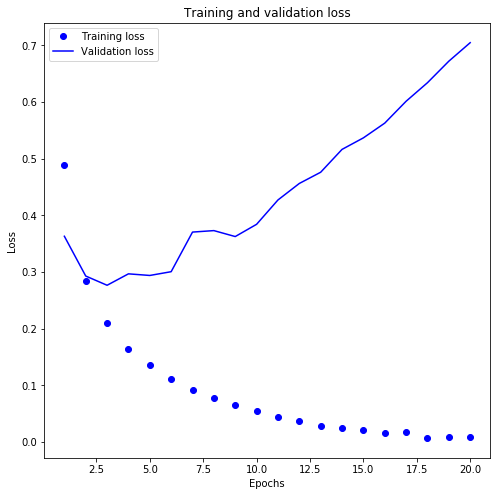

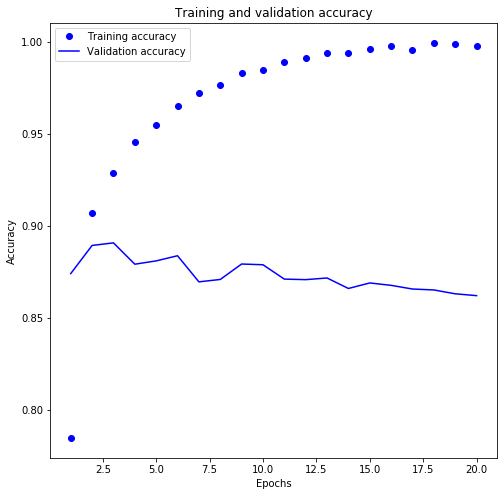

In [78]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = np.arange(1,21)

plt.figure(figsize = (8,8))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.figure(figsize = (8,8))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Наглядный пример переобучения

### Новая модель с 4 эпохами

In [81]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [84]:
model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.4485 - accuracy: 0.8146
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2548 - accuracy: 0.9088
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1984 - accuracy: 0.9272
Epoch 4/4
25000/25000 [==============================] - 6s 251us/step


[0.3050349923181534, 0.8793200254440308]

In [85]:
model2.predict(x_test)

array([[0.15095562],
       [0.99985784],
       [0.9266213 ],
       ...,
       [0.0708915 ],
       [0.04855889],
       [0.3747803 ]], dtype=float32)